# Euler's method

## The basic observation

The reality is, most differential equations are either practically impossible or very tedious to solve by hand. Hence the importance of computational methods to solve ODEs. 

Way back in the day, Euler devised an algorithm to solve an initial value problem of the form $$y' = f(t, y), \, \, \text{ with } \, \, y(t_0) = y_0$$ Here's the idea: if $\Delta t$ is a _small_ time interval starting at $t_0$, and $t_1 = t_0+\Delta t$ (so that $\Delta t = t_1 - t_0$) then from the definition of the derivative we should have $$\frac{y(t_1) - y(t_0)}{\Delta t} \approx y'(t_0) = f(t_0, y_0)$$ Rearranging, this says $$y(t_1) \approx y_0 + f(t_0, y_0) \Delta t$$ Set $y_1 = y_0 + f(t_0, y_0) \Delta t$.

## Iterating on the basic observation

Now we can repeat this process, but starting with $t_1$ and $y_1$ (instead of $t_0$ and $y_0$). We'll get $t_2 = t_1+ \Delta t$, and $$y_2 = y_1 + f(t_1, y_1) \Delta t$$ And so on  - what we're doing is iterating on the equation $$ y_{i+1} = y_i + f(t_i, y_i) (t_{i+1} - t_i)$$ 

As an algorithm, Euler's method takes as input a differential equation $y' = f(t, y)$, a list of times $t_0, t_1, \dots, t_n$, and an initial condition $y(t_0) = y_0$. It then uses the equation $ y_{i+1} = y_i + f(t_i, y_i) (t_{i+1} - t_i)$ to produce estimates $y(t_1) \approx y_1, \dots, y(t_n) \approx y_n$  

## Implementing the algorithm

Below, we build a `python` function called `euler` which takes as input 

- a function $f(t, y)$ (the right hand side of the ODE), 
- an initial value $y_0$
- a "time" interval $[t_min, t_max]$ (with $t_0 = t_min$), and 
- a number of steps $n$ (in other words, $[t_min, t_max]$ will get broken into $t_min = t_0 < t_1 < t_2 < \dots < t_n = t_max$). 

The output of `euler` will be a pair of arrays `t, y`, where `t = [t_0, t_1, \dots, t_n]` is the list of times and `y = [y_0, y_1, \dots, y_n]` is the list of (approximate) $y$-values at those times. 

## Packages

Most of the work is handled by `numpy` the standard `python` package for numerical computing. 

In [1]:
# Import some packages
import numpy as np

In [2]:
# Define our function
def euler(f, y_0, t_min, t_max, steps=100):
    """implements euler's method for solving a first order ODE
    y' = f(t, y) on an interval [t_min, t_max], with 'steps' number 
    of iterations. assumes y_0 = y(t_0). Returns 1D arrays t, y"""
    # First we need to break the interval [t_min, t_max] into 'steps'
    # times. np.linspace does exactly that:
    t = np.linspace(t_min, t_max, steps)
    # We initialize the y array as all zeros:
    y = np.zeros(steps)
    # then set y[0]= y_0
    y[0] = y_0
    # Now we run a 'for' loop, computing the 
    # rest of the y_i's one at a time:
    for i in range(0, steps-1):
        y[i+1] = y[i] + f(t[i], y[i])*(t[i+1] - t[i])
        
    # that's it! return t, y:
    return t, y

In [37]:
# Now import some plotting packages:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6.5]
import seaborn as sns
sns.set()

## Testing Euler's method

### Example

To test our work, let's use the simple equation $y' = - y + 1$

In [4]:
def test_f(t, y):
    return (-1)*y + 1

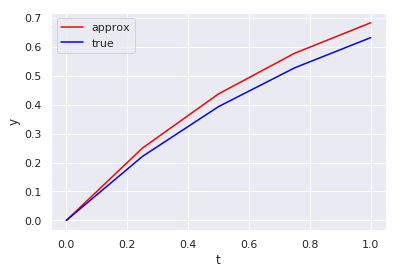

In [5]:
# To see the method in action, use 5 steps:
t, y = euler(test_f, 0, 0, 1, 5)

# Plot
plt.plot(t, y, c='red', label='approx')
plt.plot(t, 1 - np.exp(-t), c='blue', label='true')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()

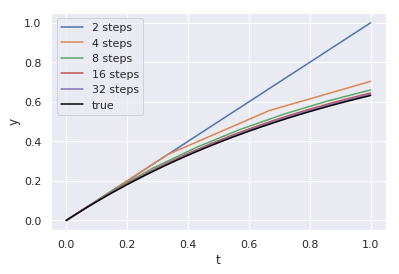

In [6]:
# Using more steps, it gets harder to tell the curves appart:

for steps in [2, 4, 8, 16, 32]:
    t, y = euler(test_f, 0, 0, 1, steps)
    # Plot
    plt.plot(t, y, label=str(steps)+' steps')
    
plt.plot(t, 1 - np.exp(-t), c='black', label='true')    
plt.xlabel('t')
plt.ylabel('y')
plt.legend()

### Example

The autonomous equation $y' = \frac{y - y^3}{10}$ (slope field below). 

![It's slope field looks like](./aut_slope_field.png)

Note that there are stable equilibria at $y= \pm 1$, and an unstable equilibrium at $y=0$. We could solve this equation (using partial fractions!) but instead let's just use Euler's method:

In [7]:
def f(t, y):
    return (y - y**3)/10

Text(0, 0.5, 'y')

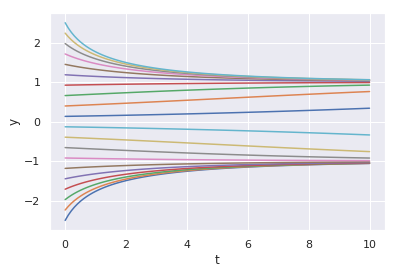

In [8]:
# Compute/plot solution curves for various initial conditions:
for y_0 in np.linspace(-2.5, 2.5, 20):
    t, y = euler(f, y_0, 0, 10, 100)
    plt.plot(t, y)
    
plt.xlabel('t')
plt.ylabel('y')

### Example

The first order linear equation $$y' + \frac{y}{2+ \sin(2 \pi t)} = e^{0.1 t} - 1$$  ![It's slope field looks like](./FOL_slope_field.png) 

In [9]:
# Define function on the RHS of the ODE:
def f(t, y):
    return np.exp(0.1*t) - 1 - y/(2+ np.sin(2*np.pi*t))

Text(0, 0.5, 'y')

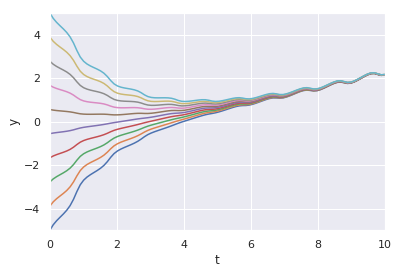

In [10]:
# Now plot solution curves for various initial conditions: 
y_not = np.linspace(-5, 5, 10)
for y_0 in y_not:
    t, y = euler(f, y_0, 0, 10, 100)
    plt.plot(t, y)
    
plt.xlim(0, 10)
plt.ylim(-5, 5)
plt.xlabel('t')
plt.ylabel('y')

### What other equations should we plug into this machine?!

In [69]:
def f(t, y):
    return (np.cos(2*np.pi*t))/(2-y)

In [70]:
t, y = euler(f, 0, 0, 1, 1000)

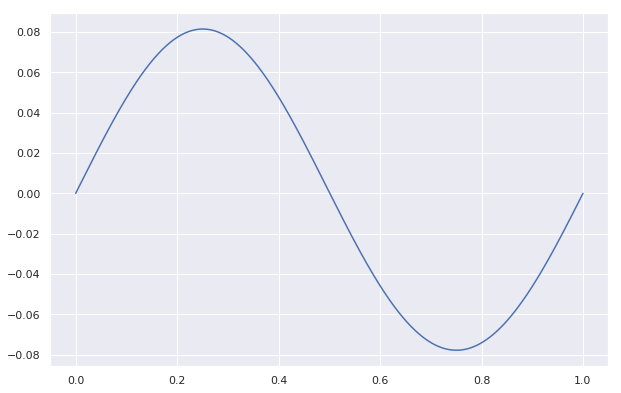

In [71]:
plt.plot(t, y)